<a href="https://colab.research.google.com/github/corioIA/Projet_IA/blob/main/IA_bat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJET D'IA

I- Introduction

Dans la continuité du cours du premier semestre "Introduction à l'IA et à la data science" nous avons du réaliser un projet de maching learning supervisé dans le but de de concevoir, développer et presenter un modèle d"apprentissage automatique. Notre projet consite à prévoir la durée de vie résiduelle des batteries lithium-ion. Nous avions pour cela un essemble de données non-traité à notre disposition. Vous trouverez dans ce rapport notre démarche expliquée ainsi que notre reflexion. En, plus du texte les lignes de code seront commentées et font parties du rapport.  

II- Prise en main du Data set

Dans un premier temps, nous devions nous familiariser avec le Data set. Pour cela nous devions d'abord trouvez où notre document python etait pour mettre au même endroit notre data set.

In [45]:
pwd

'/content'

La commande dans la cellule ci-dessus permet de savoir où est situé notre document python dans colab et ainsi nous permet de telecharger le data set ou même endroitque notre code pour pouvoir l'ouvrir.
La premiere cellule d'un projet contient toujours les bibliothèques que nous avons utilisé pour le projet. Comme vous pouvez le voir ci-dessous les pricipales sont : Numpy permettant d'effectuer des calculs logiques et mathématiques sur des tableaux et des matrices, pandas permettant une structure de données efficace et rapide pour la manipulation des données avec indexation intégrée, matplotlib et seaborn permettant la creation de differents graphiques et sklearn permettant l'importation du PCA et de différents modèle pour notre projet.







In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV



In [47]:
df=pd.read_csv('Battery_RUL.csv')#Permet la lecture du fichier csv à l'aide de la fonction read de pandas et le tansforme directement en datframe

df.head(10)#Permet d'afficher les 10 permieres ligne du dataframe

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107
5,7.0,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106
6,8.0,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105
7,9.0,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104
8,10.0,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103
9,11.0,435251.49,263086.078000,4.267,3.086,269.984000,443700.02,443700.02,1102


In [48]:
df.shape# Nous permet d'avoir le nombre de colonne et lignes du dataframe


(15064, 9)

In [49]:
df.info()#Nous donne diffèrentes information sur le dataframe telle que le rangeIndex le Datatype ou la mémoire utilisée.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [50]:
df.describe()#Permet de décrire le dataframe et perment de nous projeter sur le nettoyage de celui-ci

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


Après avoir pris en main le dataframe à l'aide de differentes méthodes des diffèrentes bibliothèques, nous avons maintenant une milleur vu d'essemble sur nos donnée. Nous devons maintenant passer à l'étape la plus cruciale : le nettoyage de la base de données.

III- Le Nettoyage et analyse

Le nettoyage d'un data set permet de supprimer les valeurs pouvant dégrader la performance de nos modèles choisient.
Les différents éléments à nettoyer sont les doublons, les valeurs abérrantes et les valeurs manquantes.

Nous avons choisit de commencer par la suppréssion des valeurs abérrantes. Pour cela, nous avons effectuer une analyse descriptive sur chacune de nos variables à l'aide de la methodes boxplot de la bibliothèques seaborn.


<Axes: ylabel='Cycle_Index'>

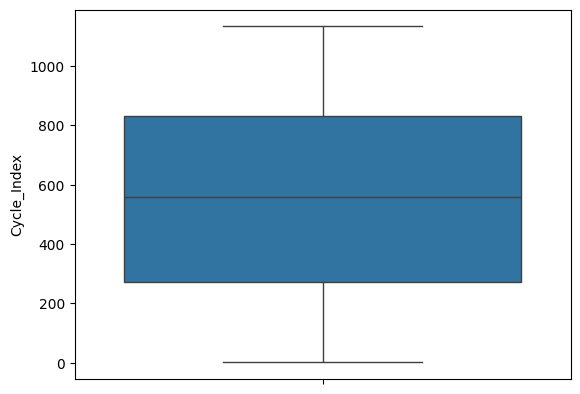

In [51]:
#Analyse descriptive de la variable Cycle_Index
sns.boxplot(data=df, y="Cycle_Index")


La variable "Cycle index" ne requière aucun nettoyage, nous n'avons pas detecté de valeurs abérrantes. La deuxième variable "Discharge time (s)" necessite un nettoyage. En effets, premièrement nous remarquons que celle-ci contient des valeurs négative. Or, un temps ne peut être négatif. Après cela je me suis renseigné sur le temps de décharge moyen d'une batterie lithium-ion. Nous avons remarqué que comparé à cette moyenne les valeurs max et min etaient beaucoup trop divergente. Nous avons donc décider de ne garder que les valeur au dessus de 1150 secondes et en dessous de 2500 secondes. Nous pensons qu'il est logique lors de test visant à récuperer ce genre de données l'ecart exigé ne peut pas être énorme si le test est le même pour chaque decharge, d'où le choix de notre encadrement de valeur.

In [52]:
df=df[df['Discharge Time (s)']>=1150]
df=df[df['Discharge Time (s)']<=2500]
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000,11266.000000
mean,435.220398,1697.525035,524.374377,3.933421,3.547025,3413.382436,4303.506370,8496.011325,675.131546
std,250.499776,317.559320,151.087546,0.056033,0.107198,1015.345478,1095.108221,550.399590,250.623807
min,12.000000,1150.050000,301.028571,3.794000,3.355000,-113.584000,5.980000,5.980000,142.000000
25%,217.000000,1440.000000,396.000000,3.885000,3.472000,2564.346000,3419.055000,8146.750000,467.000000
50%,439.000000,1700.000000,493.000000,3.935000,3.540000,3399.552000,4328.315000,8495.460000,672.000000
75%,645.000000,1968.000000,636.800000,3.979000,3.611000,4285.155250,5228.340000,8845.982500,893.000000
max,966.000000,2278.750000,936.000000,4.050000,4.379000,5480.352000,17036.970000,18264.560000,1121.000000


<Axes: ylabel='Discharge Time (s)'>

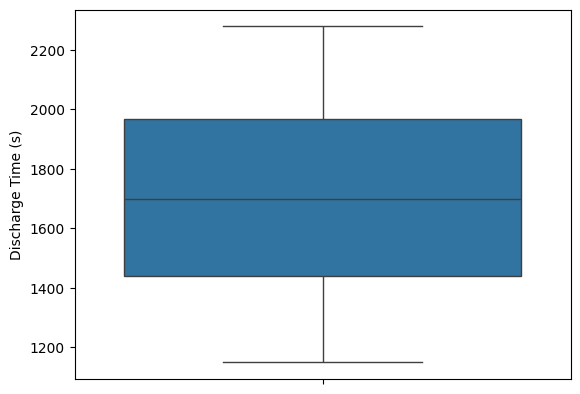

In [53]:
#Analyse descriptive de la variable Discharge Time
sns.boxplot(data=df, y="Discharge Time (s)")

De même pour la variable "Decrement 3.6-3.4V (s)" nous remarquon des valeurs de temps negatives que nous supprimons également.

<Axes: ylabel='Decrement 3.6-3.4V (s)'>

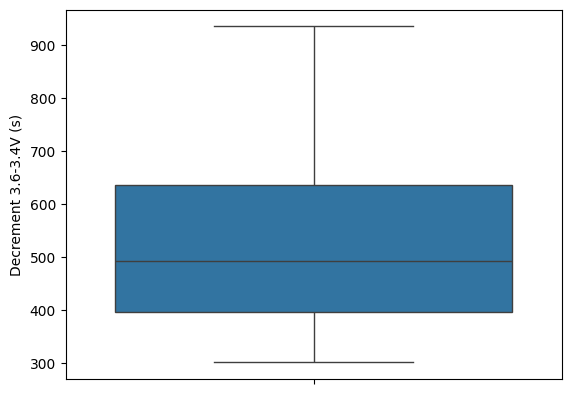

In [54]:
#Analyse descriptive de la variable Decrement 3.6-3.4V
sns.boxplot(data=df, y="Decrement 3.6-3.4V (s)")

In [55]:
#Suppression des valuers abérantes.
df=df[df['Decrement 3.6-3.4V (s)']>=0] # on affecte au dataframe toute les valeur qui n'ont pas de Decrement 3.6-3.4V (s) < 0 ce qui supprime ainsi toute les valeurs negative. Un temps négatif n'existant pas
#df.describe()

<Axes: ylabel='Max. Voltage Dischar. (V)'>

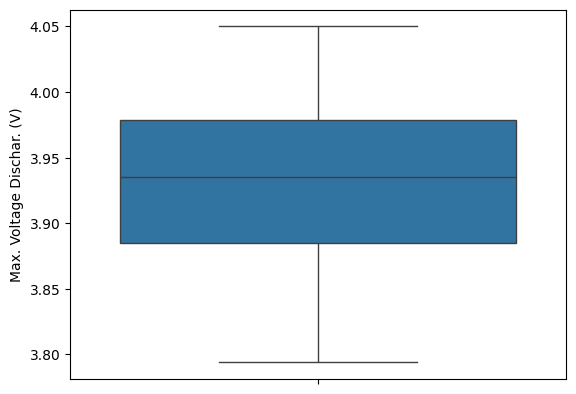

In [56]:
#Analyse descriptive de la variable Max. Voltage Dischar.
sns.boxplot(data=df, y="Max. Voltage Dischar. (V)")

La variable "Max. Voltage Dischar. (V)" et La variable "Min. Voltage Charg. (V)" ne semble pas avoir de valeur aberrante nous avons donc décidé de ne rien supprimer pour ces deux variables.

<Axes: ylabel='Min. Voltage Charg. (V)'>

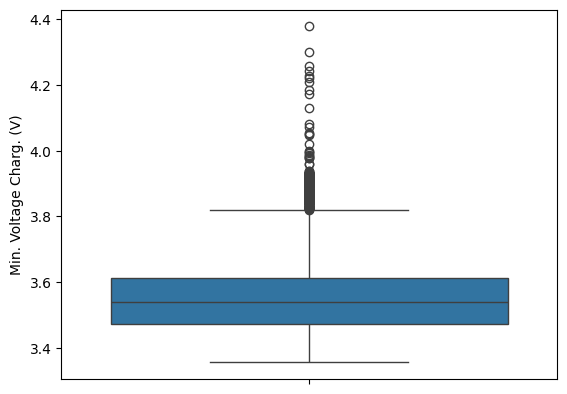

In [57]:
#Analyse descriptive de la variable Min. Voltage Charg.
sns.boxplot(data=df, y="Min. Voltage Charg. (V)")

<Axes: ylabel='Time at 4.15V (s)'>

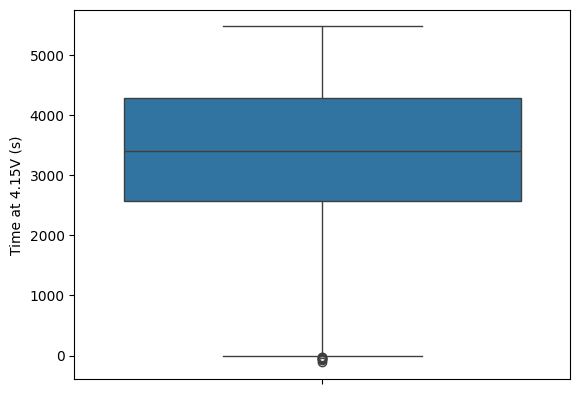

In [58]:
#Analyse descriptive de la variable Time at 4.15V
sns.boxplot(data=df, y="Time at 4.15V (s)")

La variable 'Time at 4.15V (s)' contient  aussi des valeurs de temps négatives que nous supprimons.

<Axes: ylabel='Time at 4.15V (s)'>

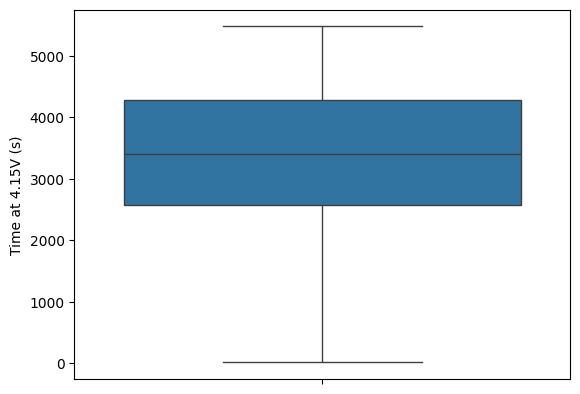

In [59]:
#Suppression des valeurs abérantes de la colonne Time at 4.15V (s).
df=df[df['Time at 4.15V (s)']>=0]
sns.boxplot(data=df, y="Time at 4.15V (s)")# On replot la box pour voir les effets de nos modifications



Nous avons de ne pas toucher à la variable "Time constant current (s)" qui semble correcte.

<Axes: ylabel='Time constant current (s)'>

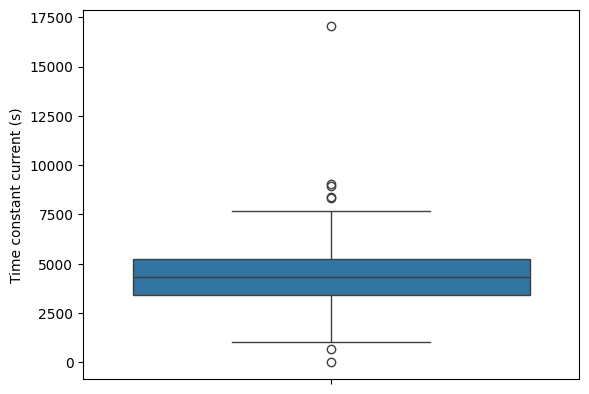

In [60]:
#Analyse descriptive de la variable Time constant current
sns.boxplot(data=df, y="Time constant current (s)")

La variable "Charging time (s)" contenait elle aussi des valeurs de temps négatives. Et comme pour la variable "Discharge Time (s)", nous avons decidé de creer un ecadrement plus précis pour pouvoir garder que des valeurs améliorant notre data set et ainsi pouvoir mieux prédire la duréé de vie résiduelle d'une batterie. Nous nous sommes donc renseignés sur le temps de charge moyen d'une batterie lithium-ion et nous avons trouver que les valeurs maximum et minimum etaient soit beaucoup trop hautes soit beaucoup trop faibles. Par exemple la valeur minimal après avoir supprimé les valeurs negatives était de 5 secondes ce qui en toute logique est beaucoup trop faible pour recharger une batterie. Après reflexion, nous sommes donc arrivé à l'encadrement dans la cellule ci-dessous qui est entre 7200 seconde et 9750 seconde.

In [61]:
#Suppression des valeurs abérantes.
df=df[df['Charging time (s)']>=7200]
df=df[df['Charging time (s)']<=9750]

#df.describe()

<Axes: ylabel='Charging time (s)'>

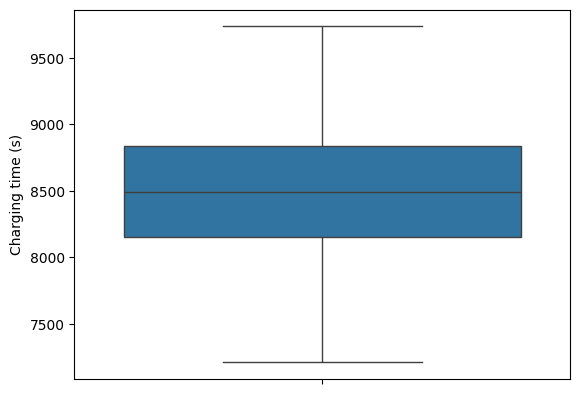

In [62]:
#Analyse descriptive de la variable Charging time (s).
sns.boxplot(data=df, y="Charging time (s)")

La variable "RUL" n'a pas eu besoin d'être nettoyé.

<Axes: ylabel='RUL'>

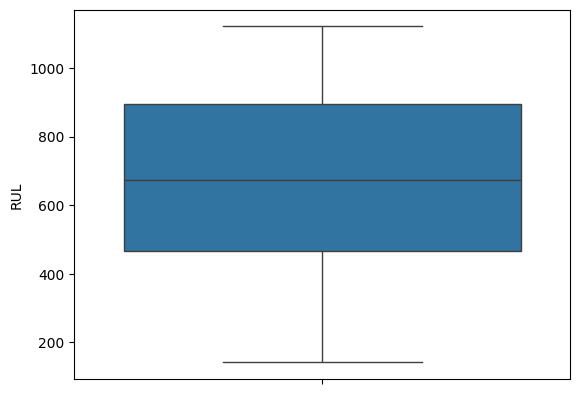

In [63]:
#Analyse descriptive de la variable RUL
sns.boxplot(data=df, y="RUL")

Dans la cellule ci-dessous la méthode duplicate nous permet de trouver les doublon présent dans le data set. Et comme indiqué dans la cellule notre data set ne contient aucun doublon.

In [64]:
#Recherche de doublon dans le dataSet
df.duplicated().sum() # Il n'y a pas de doublon

0

Nous devions ensuite créer une matrice de corélation. Celle- ci permet comme sont nom l'indique de voir la corrélation entre  les diffèrentes variables de notre data set. si les valeurs sont  entre tels et tels valeur alors il y a forte corrélation entre les deux variables et entre tel et tel valeur mauvaise corrélation entre les valeurs. Pour créer la matrice  nous avons utiliser la bibliotheques seaborn qui nous explique à l'aide de sa documentaton comment la réaliser. Les commentaires dans la cellule ci-dessous explique les differentes étapes de création.

<Axes: >

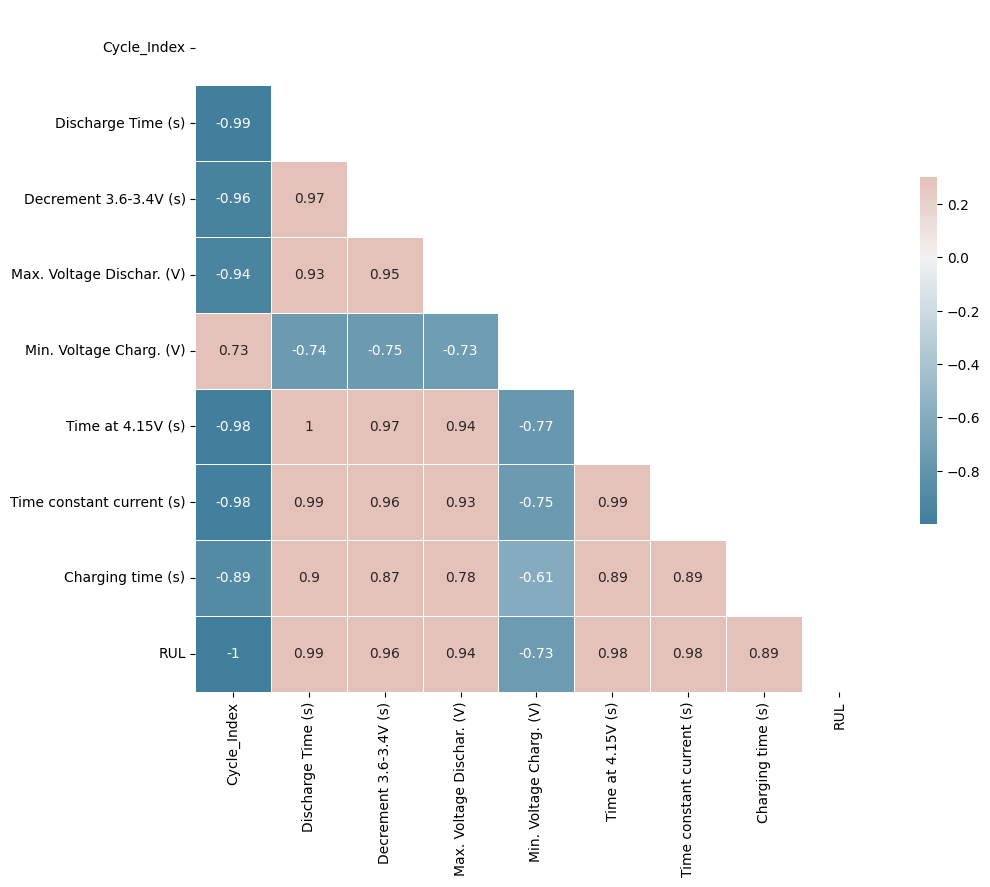

In [65]:
#Matrice de corrélation
corr = df.corr()

# Génere un masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Nous avons ensuite tracé des courbes bi-variable. Pour cela pour pouvoir tirer des résultas nous avons tracé des valeurs fortement collerer pour pouvoir tirer des info des courbes et pouvant nous donné des intutions pour le feature engineering. Le RUL étant notre target et la Variable "Cycle Index" n'étant pas utile dans nos modèles nous ne traçons pas de courbes avec c'est deux variable. Plus blabla sur les courbes et rajouter des courbes

<Axes: xlabel='Discharge Time (s)', ylabel='Time at 4.15V (s)'>

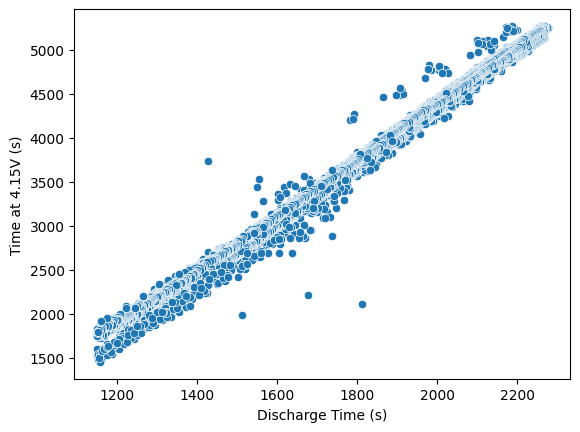

In [66]:
#Courbe bivariable

sns.scatterplot(data=df,x='Discharge Time (s)',y='Time at 4.15V (s)')



<Axes: xlabel='Discharge Time (s)', ylabel='Charging time (s)'>

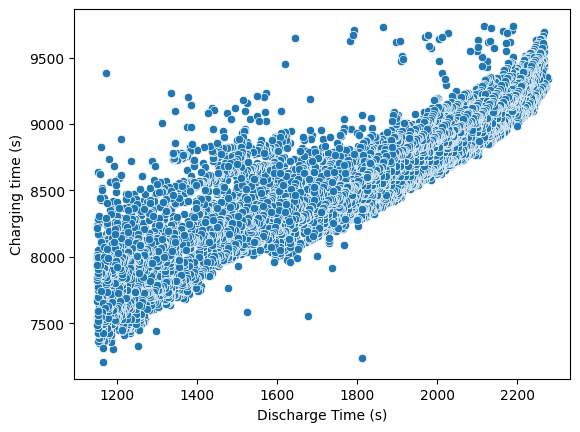

In [67]:
sns.scatterplot(data=df,x='Discharge Time (s)',y='Charging time (s)')

<Axes: xlabel='Discharge Time (s)', ylabel='Time constant current (s)'>

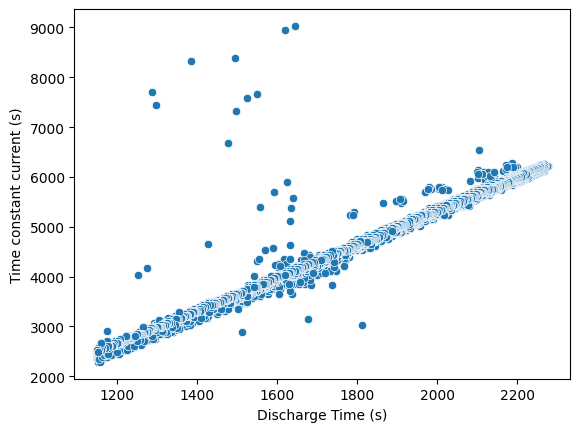

In [68]:
sns.scatterplot(data=df,x='Discharge Time (s)',y='Time constant current (s)')

III- Feature Engineering

Le feature engineering consiste à créer de nouvelles variables nous permettant de rendre plus efficace et plus précis notre ensemble d'étude et ainsi obtenir un modèle d'une meilleur qualité. Pour cela il faut trouver des liens entre les différentes variables descriptives de notre système pour effectuer, entre elles des opérations mathématiques pour en obtenir de nouvelles.
Dans certains cas, il est possible de ne pas faire de feature engineering. Ici, après l'étude de la matrice de corrélation et des graphes bi-variés, nous observons une relation de proportionnalité (courbe linéaire) entre Discharge time et Time at 4.15V ainsi que Discharge time et Time constant current. Sachant que la variable Discharge Time est un indicateur de la santé de notre batterie (plus il diminue plus la batterie présente des signes de faiblesse) et étant fortement corrélé avec les deux autres variables citées précédemment, il nous a paru juste de créer nos deux features présente dans la cellule ci-dessous.
Le ratio créé indique la tendance suivie par nos variables, cela ajoute donc une information complémentaire importante quant à la compréhension de notre dataset.

In [69]:
#Feature engineering
#Ratio discharge/time at 4.15 V
#Ratio discharge/time at constant courant
df['Ratio_Discharge_4.15V']=df['Discharge Time (s)']/df['Time at 4.15V (s)']
df['Ratio_Discharge_Constant_Current']=df['Discharge Time (s)']/df['Time constant current (s)']
df.drop('Cycle_Index',axis=1,inplace=True)
df.head()



,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Ratio_Discharge_4.15V,Ratio_Discharge_Constant_Current
16,2259.46,883.199,4.042,3.373,5181.377,6161.38,9310.98,1095,0.436073,0.366713
17,2256.61,878.400,4.042,3.374,5181.375,6154.37,9296.64,1094,0.435523,0.366668
18,2252.83,873.601,4.043,3.374,5174.334,6147.33,9243.58,1093,0.435386,0.366473
19,2250.62,868.801,4.044,3.374,5160.289,6140.29,9245.53,1092,0.436142,0.366533
20,2248.60,868.797,4.044,3.375,5160.321,6133.34,9248.32,1091,0.435748,0.366619


In [70]:
rul=df['RUL']
df.drop('RUL',axis=1,inplace=True)
rul.shape

(11149,)

Dans la cellule ci-dessus, nous séparons notre target de notre ensemble de donnée. Il est nécessaire de faire cela au préalable pour pas que notre target entre dans les variables que notre modèle devra traiter pour prédire un résultat.

Dans la cellule ci-dessous, nous créons notre dataset d'entrainement et notre dataset d'entrainement ainsi que ceux de la target. L'ensemble d'entrainement est composé à 80% de nos données. Les autres 20% étant pour le test.

In [71]:
# création du data set d'entrainement et du data set de test

df_train, df_test, rul_train, rul_test = train_test_split(df,rul,train_size=0.8 ,test_size=0.2, random_state=42)

Pour la suite de notre feature engineering, il faut normaliser les variables du dataset.
Nous n'avons pas normalisé la target car cela n'entrait pas dans notre champs de compétences. Mais il est d'usage de normaliser celle-ci.

In [72]:
#normalisation
scaler = skl.preprocessing.StandardScaler() # Create a StandardScaler instance
scaled_data_train = scaler.fit_transform(df_train) # Fit and transform the data
scaled_data_test = scaler.fit_transform(df_test)

Dans la case ci-dessous, nous allons procéder à l'ACP. L'objectif principal de l'ACP est de transformer un jeu de données avec de nombreuses variables en un jeu de données avec moins de variables tout en préservant autant que possible l'information présente dans les données originales. Cela permet de rendre l'analyse plus rapide et plus facile, sans perdre trop d'informations pertinentes. Ceci correspond par exemple à zipper un dossier.
L'ACP se fait à l'aide de la bibliothèque sklearn importé précedemment.
L'un des problème rencontré a été de creer notre ACP avec la méthode .predict qui n'existe pas dans cette bibliothèque. En réaction, nous avons utilisé la méthode .transform. Pour le dataset d'entrainement, il faut utiliser la méthode .fit_transform.

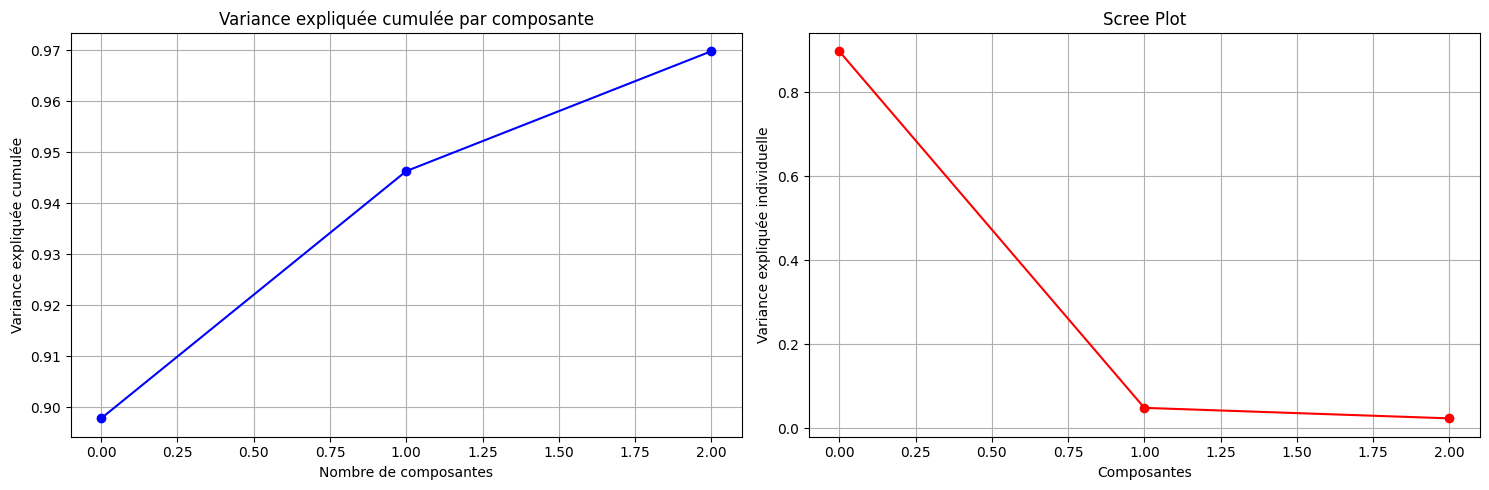

(8919, 3)

In [73]:

#df_test_ACP=ACP.predict(df_scaled_test)

def perform_pca_analysis(X, n_components=0.95):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(15, 5))

    # Variance expliquée cumulée
    plt.subplot(1, 2, 1)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
    plt.xlabel('Nombre de composantes')
    plt.ylabel('Variance expliquée cumulée')
    plt.title('Variance expliquée cumulée par composante')
    plt.grid(True)

    # Scree plot
    plt.subplot(1, 2, 2)
    plt.plot(pca.explained_variance_ratio_, 'ro-')
    plt.xlabel('Composantes')
    plt.ylabel('Variance expliquée individuelle')
    plt.title('Scree Plot')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return pca, X_pca


pca, train_pca = perform_pca_analysis(scaled_data_train )


train_pca.shape




In [74]:
test_pca= pca.transform(scaled_data_test)#ensemble de données du test aprés tranformation ACP
test_pca.shape

(2230, 3)

IV- Moélisation et évaluation


Lors de notre modélisation, nous avons réalisé 3 modèles :
 - Une régression linéaire
 - Une random forest
 - Une gradient boost

 Pour évaluer les performances de nos modèles, nous avons choisi d'utiliser les métriques d'évaluation :      
  - MAE (mesure l'écart moyen entre les valeurs réelles et les valeurs prédites, sans tenir compte du signe de l'erreur)
  - MSE (mesure la différence entre les valeurs réelles et les valeurs prédites par le modèle)
  - RMSE (est la racine carrée de la MSE)
  - r2 (mesure la fiabilité de notre modèle)

  Nous ferons maintenant une analyse de chaque modèles et de leurs metriques.

In [76]:
#modeles
model=LinearRegression()
model.fit(train_pca, rul_train)
rul_pred=model.predict(test_pca)
mae=mean_absolute_error(rul_test,rul_pred)
mse=mean_squared_error(rul_test,rul_pred)
rmse=np.sqrt(mse)
r2=r2_score(rul_test,rul_pred)
print(mae)
print(mse)
print(rmse)
print(r2)





36.23814322338929
2342.0972329623823
48.39521911266011
0.9631557161416864


Pour prendre en main la modélisations de modèle, nous avons choisi de commencé par une regression linéaire.

Ici, notre MAE est de 36.24. Ce qui signifie que, en moyenne, notre modèle fait une erreur de 36.24 cycles dans ses prédictions de durée de vie de la batterie. Cela donne une idée directe de l'écart moyen entre les prédictions et les valeurs réelles.

De plus, une MSE de 2342.10 suggère que notre modèle a des erreurs importantes (en termes de carré des écarts) qui, par rapport à d'autres modèles ou approches, pourraient être considérées comme assez grandes. Cependant, bien que la MSE soit plus grande que la MAE, ce n'est pas nécessairement un problème, car elle est plus sensible aux grandes erreurs. Cela peut indiquer que notre modèle a quelques prédictions qui sont bien en dehors de la réalité.

En outre, le RMSE est simplement la racine carrée de la MSE, ce qui le ramène à l'échelle des données d'origine. Cela donne une idée de l'erreur moyenne en termes d'unités de la variable cible. Un RMSE de 48.40, indique que l'écart-type des erreurs est d'environ 48.40 cycles.

Pour finir, un r2 de 0,96 nous indique que notre modèle est fiable à 96%. Il est donc très performant.




In [75]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_pca, rul_train)
rul_pred = model.predict(test_pca)
mae=mean_absolute_error(rul_test,rul_pred)
mse=mean_squared_error(rul_test,rul_pred)
rmse=np.sqrt(mse)
r2=r2_score(rul_test,rul_pred)
print(mae)
print(mse)
print(rmse)
print(r2)


20.76445675848815
1264.3982884734555
35.558378597363735
0.9801093443966209


 La random forest consiste en un ensemble d'arbres de décision qui travaillent ensemble pour fournir des prédictions plus robustes et plus précises que les arbres de décision individuels.
 La Random Forest est une méthode d'ensemble, ce qui signifie qu'elle combine plusieurs modèles pour améliorer la performance globale. Dans le cas du Random Forest, ce sont des arbres de décision qui sont combinés pour former un "forêt" de décisions.
Le modèle utilise des hyperparamètres. Nous expliqueront dans la partie V ce qu'est un hyperparamètre et comment nous les avons optimiser.
Dans un prmeir temps les hyperamètres selectionnés sont ceux par défaut.

Nous obtenons les métriques suivant:
- Une MAE de 20,7, ce qui signifie que notre système se trompe de 20,7 cycles de durée de vie en moyenne
- Une MSE de 1264 nous indique que notre modèle possède des erreurs assez élevées en moyenne et qu'il est sensible aux grandes erreurs.
- Une RMSE de 35,5 cycles signifie que nous avons un écart-type des erreurs qui est en moyenne de 35,5 cycles.
- Enfin, une r2 de 0,98 nous montre quze notre modèle est fiable à 98% et qu'il possède donc une grande performance.

Comparé au modèle de régression linéaire ce modèle est plus performant.


In [77]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(train_pca, rul_train)
rul_pred = model.predict(test_pca)
mae=mean_absolute_error(rul_test,rul_pred)
mse=mean_squared_error(rul_test,rul_pred)
rmse=np.sqrt(mse)
r2=r2_score(rul_test,rul_pred)
# Affichage des résultats
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 29.849838095051084
MSE: 1705.5914765415885
RMSE: 41.29880720482843
R²: 0.9731687926429364


Pour le 3ème modèle, nous avons choisi de faire un gradient boosting regressor. Cet estimateur construit un modèle additif de manière progressive, étape par étape ; il permet d'optimiser des fonctions de perte différentiables arbitraires. À chaque étape, un arbre de régression est ajusté sur le gradient négatif de la fonction de perte donnée.
Tout come le modèle précédent, celui-ci utilise des hyperparamètres défini par défaut.
Nous obtenons les métriques suivant:
- Une MAE de 29,8, ce qui signifie que notre système se trompe de 29,8 cycles de durée de vie en moyenne
- Une MSE de 1705,6 nous indique que notre modèle possède des erreurs assez élevées en moyenne et qu'il est sensible aux grandes erreurs.
- Une RMSE de 41,3 cycles signifie que nous avons un écart-type des erreurs qui est en moyenne de 41,3 cycles.
- Enfin, une r2 de 0,97 nous montre quze notre modèle est fiable à 98% et qu'il possède donc une grande performance.

Nous obtenons des résultats similaires à notre model random forest. Bien que ceux-ci soient moins bons.


Dans leur globalité, nos trois modèles obtiennent des résultats satisfaisant bien que nous ayons une MSE assez élevée. Ce métrique peut être amélioré grâce à l'optimisation des hyperparamètres.
Cela traduit notre bonne compréhension du sujet et notre bon traitement du dataset.

V-Hyperparamètre


Les hyperparamètres sont des paramètres que l'utilisateur doit spécifier et qui influencent la façon dont le modèle va apprendre à partir des données.
Nous choississons de faire cette optimisation sur le modèle random forest (Celui-ci étant notre modèle le plus performant).

De plus, lors de l'optimisation des hyperparamètres, il est crucial d'utiliser la validation croisée pour éviter le sur-apprentissage. Cela permet de s’assurer que le modèle est bien évalué sur différentes portions de données et qu’il peut généraliser de manière fiable sur des données non vues.

Dans scikit-learn, l'option cv dans GridSearchCV et RandomizedSearchCV effectue automatiquement la validation croisée. Nous en faisons 3.

Nous choisissons d'optimiser les paramètres suivant:

- n_estimators, le nombre d'arbre
- max_depth, la profondeur de la fôret
- min_samples_split, le nombre minimum d'echantillon permettant de spérare un noeud interne
- min_samples_leaf, le minimum d'échatillon pour former un feuille
- max_feature, le nombre de feature à considérer pour avoir la meilleure séparation.





In [85]:
model=RandomForestRegressor()

param_dist={'n_estimators': np.arange(100, 500, 150), "max_depth" : [5,10,15,None], "min_samples_split" : [2, 5, 10], "min_samples_leaf" : [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}

model_opti=RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=75, cv=3, n_jobs=-1)
model_opti.fit(train_pca, rul_train)
print(model_opti.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
66 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [86]:
model = RandomForestRegressor(n_estimators=400, min_samples_split=2,min_samples_leaf=1, max_features='sqrt' ,random_state=42)
model.fit(train_pca, rul_train)
rul_pred = model.predict(test_pca)
mae=mean_absolute_error(rul_test,rul_pred)
mse=mean_squared_error(rul_test,rul_pred)
rmse=np.sqrt(mse)
r2=r2_score(rul_test,rul_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

22.40231534806748
1241.9587073836635
35.24143452505393
0.9804623486543853


L'optimisation des hyperparmètres étant trés couteuse en temps nous avons optimiser que certains paramètres et fait un nombre faible d'itération. L'optimisation nous donnant des valeurs de métriques trés proche de celle obtenues sans optimisation, nous concluons que notre optimisation n'est pas satisfaisante et qu'il faudrait soit plus de temps pour tester plus de combinaisons soit une plus grande puissance de calcul sachant que nous utilisons déja tout les coeurs disponiblent. Cependant, nous arrivons quand même à diminuer la MSE.

VI- Analyse des résultats

Pour ce projet d'IA, nous devions créer un programme à partir d'un dataset pour estimer la durée de vie résiduel d'une batterie lithium-ion.
Nous avons procédé en suivant les étapes d'un projet d'IA à savoir :
- Nettoyage du dataset
- feature engineering
- Préparation du dataset (test et entrainement)
- Modélisation
- Optimisation
- Evaluation
Au cours de l'étape de compréhension des données, nous avons trouvé que les variables les plus importantes pour avoir une bonne estimation étaient :    
- Discharge Time
- Time at 4.15V
- Time at constant current

Ensuite, nous avons fait le choix de trois modèles différents :    
- Regression
- Random forest regression
- Grandient boost

En évaluant ces trois modèles nous avons déterminer que le meilleur était le random forest regression. Nous avons ensuite procédé à une optimisation de ses hyperparamètres.
Nous obtenons une évaluation très pertinentes avec par exemple un r2 de 0,98 ce qui reflète bien la fiabilité de notre modèle. De plus notre MAE est de 22,4 ce qui signifie que notre modèle se trompe de 22,4 cycle. Le nombre de cycle oscillant autour de 1000 cycles, nous avons donc une erreur de seulement 2%. Notre modèle possède donc de bonnes performances et est donc viable pour le calcul de la durée de vie résiduelle d'une batterie.


VII-Conclusion


Pour conclure, notre modèle présente de bonnes qualités. Il peut néanmoins être amélioré en utilisant d'autres types de modèles que les trois utilisés lors de ce projet. Par exemple, l'utilisation d'un réseau de neuronne qui au vu des thèses faites sur le sujet est plus répendu. De plus nous pourrons également utilisé une autre technioque pour l'optimisation des hyperparamètres. Nous pourrons également améliorer la partie feature engineering en rajoutant des features qui apporteraient plus d'informations à notre dataset.